In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [3]:
data = pd.read_csv('Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [ ]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

array([[663.59],
       [666.45],
       [657.21],
       ...,
       [785.05],
       [782.79],
       [771.82]])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [7]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [8]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)
print(X_train.shape)
print(y_train)

(1089, 60)
[0.36065992 0.34406906 0.35722573 ... 0.68184982 0.67660572 0.65115092]


In [9]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [ ]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 3s - 81ms/step - loss: 0.0769
Epoch 2/20
35/35 - 1s - 22ms/step - loss: 0.0321
Epoch 3/20
35/35 - 1s - 31ms/step - loss: 0.0211
Epoch 4/20
35/35 - 1s - 28ms/step - loss: 0.0236
Epoch 5/20
35/35 - 1s - 26ms/step - loss: 0.0188
Epoch 6/20
35/35 - 1s - 27ms/step - loss: 0.0198
Epoch 7/20
35/35 - 1s - 29ms/step - loss: 0.0183
Epoch 8/20
35/35 - 1s - 25ms/step - loss: 0.0182
Epoch 9/20
35/35 - 1s - 34ms/step - loss: 0.0154
Epoch 10/20
35/35 - 1s - 25ms/step - loss: 0.0158
Epoch 11/20
35/35 - 1s - 24ms/step - loss: 0.0165
Epoch 12/20
35/35 - 1s - 37ms/step - loss: 0.0159
Epoch 13/20
35/35 - 1s - 28ms/step - loss: 0.0131
Epoch 14/20
35/35 - 1s - 26ms/step - loss: 0.0147
Epoch 15/20
35/35 - 1s - 24ms/step - loss: 0.0146
Epoch 16/20
35/35 - 1s - 24ms/step - loss: 0.0155
Epoch 17/20
35/35 - 1s - 25ms/step - loss: 0.0121
Epoch 18/20
35/35 - 1s - 27ms/step - loss: 0.0127
Epoch 19/20
35/35 - 1s - 24ms/step - loss: 0.0134
Epoch 20/20
35/35 - 1s - 28ms/step - loss: 0.0123


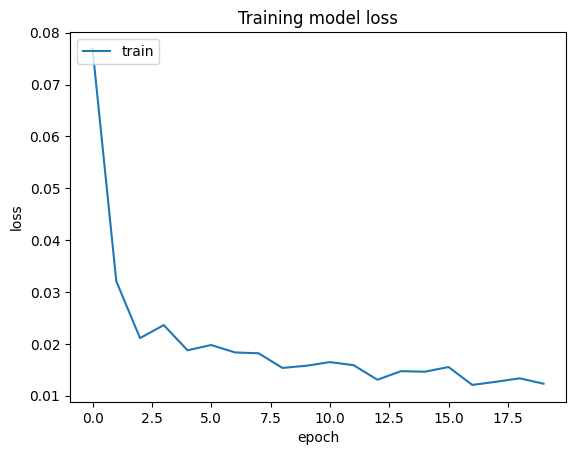

In [30]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [31]:
testData = pd.read_csv('Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [32]:
y_pred = model.predict(X_test)
y_pred

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  


array([[1.1319232],
       [1.1253821],
       [1.1199312],
       [1.1159517],
       [1.1135013],
       [1.1122056],
       [1.1115583],
       [1.1111653],
       [1.1109488],
       [1.1109232],
       [1.1107395],
       [1.1100826],
       [1.1088586],
       [1.1069695],
       [1.1046385],
       [1.1021433],
       [1.100162 ],
       [1.0993483],
       [1.1001911],
       [1.1030122],
       [1.1073601],
       [1.1126983],
       [1.1182085],
       [1.1231601],
       [1.1271261],
       [1.130011 ],
       [1.1318833],
       [1.1327199],
       [1.1322908],
       [1.1305139],
       [1.1273925],
       [1.1229036],
       [1.1168065],
       [1.1089015],
       [1.0998311],
       [1.0905612],
       [1.0819664],
       [1.0747102],
       [1.0693147],
       [1.0657539],
       [1.0643247],
       [1.0652075],
       [1.068439 ],
       [1.0738393],
       [1.0809907],
       [1.0892218],
       [1.097735 ],
       [1.1060917],
       [1.1140649],
       [1.1216112],


In [33]:
predicted_price = sc.inverse_transform(y_pred)

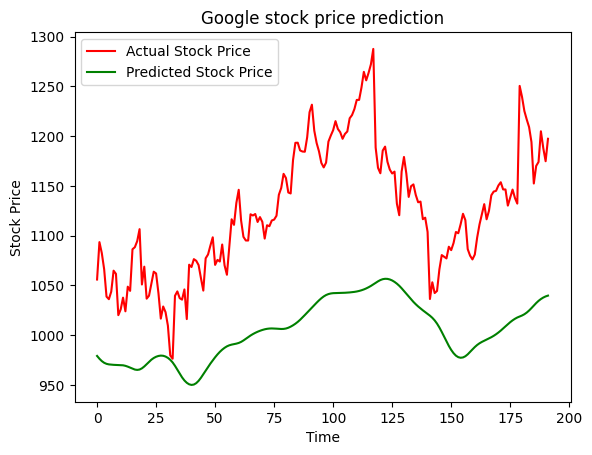

In [34]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()